### Same notebook as train_lgb but using random_forest for training

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_tr = pd.read_csv('df_tr.csv')
df_va = pd.read_csv('df_va.csv')

In [3]:
print(df_tr.shape, df_va.shape)

(3700, 30) (200, 30)


In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
xtr = df_tr.copy()
ytr = xtr.classLabel
xtr = xtr.drop('classLabel', axis=1)

In [6]:
xva = df_va.copy()
yva = xva.classLabel
xva = xva.drop('classLabel', axis=1)

In [7]:
print(xtr.shape,ytr.shape)
print(xva.shape,yva.shape)

(3700, 29) (3700,)
(200, 29) (200,)


In [8]:
rf = RandomForestClassifier()
rf.fit(xtr,ytr)

/home/magdy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

([<matplotlib.axis.XTick at 0x7f12d8838e48>,
 <a list of 29 Text xticklabel objects>)

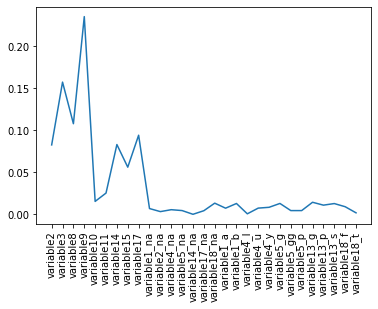

In [9]:
#plot feature importances
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(xtr.shape[1]), xtr.columns.to_list(), rotation=90)

In [10]:
from sklearn.metrics import roc_auc_score

In [11]:
def print_score(m):
    print(roc_auc_score(ytr, m.predict(xtr)), roc_auc_score(yva, m.predict(xva)))

In [23]:
rf = RandomForestClassifier(n_estimators=200, max_depth=20, max_features='log2', min_samples_leaf=1)
rf.fit(xtr,ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### best score i coult get

In [24]:
print_score(rf)

1.0 0.8696110943623756
